<a href="https://colab.research.google.com/github/ashwinkrishna948/nlp-bagofwords-restaurant-reviews/blob/main/NLP_BagofWords_Rest_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3, engine='python')

In [ ]:
data.head()
df1 = data.copy()

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [ ]:
len(X[0])

1500

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
f1_score_nb = f1_score(y_pred, y_test, average=None)
accuracy_nb = accuracy_score(y_pred, y_test)*100
precision_nb = precision_score(y_pred, y_test, average=None)
recall_nb = recall_score(y_pred, y_test, average=None)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
y_predlg = lg.fit(X_train, y_train).predict(X_test)

In [ ]:
cm = confusion_matrix(y_predlg, y_test)
f1_score_lg = f1_score(y_predlg, y_test, average=None)
accuracy_lg = accuracy_score(y_predlg, y_test)*100
precision_lg = precision_score(y_predlg, y_test, average=None)
recall_lg = recall_score(y_predlg, y_test, average=None)

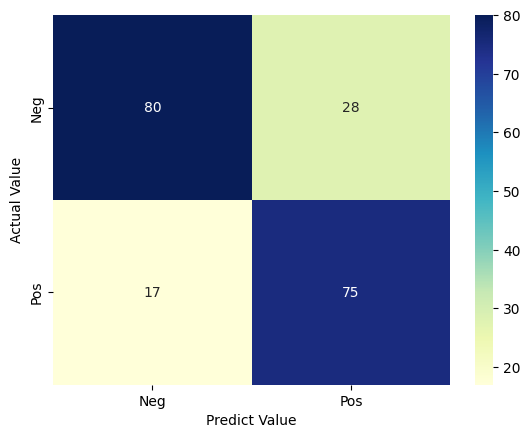

In [ ]:
sns.heatmap(cm, annot = True, cmap = "YlGnBu",
           xticklabels=["Neg", "Pos"],
           yticklabels=["Neg", "Pos"])

plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

In [ ]:
from sklearn import svm
clf = svm.SVC()
y_predclf = clf.fit(X_train, y_train).predict(X_test)

In [ ]:
final = pd.DataFrame()
final["Actual"] = y_test
final["Predicted"] = y_predclf

In [ ]:
cm2 = confusion_matrix(y_predclf, y_test)
f1_score_svm = f1_score(y_predclf, y_test, average=None)
accuracy_svm = accuracy_score(y_predclf, y_test)*100
precision_svm = precision_score(y_predclf, y_test, average=None)
recall_svm = recall_score(y_predclf, y_test, average=None)

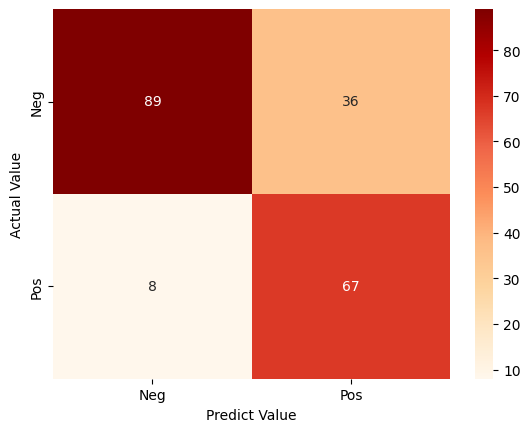

In [ ]:
sns.heatmap(cm2, annot = True, cmap = "OrRd",
           xticklabels=["Neg", "Pos"],
           yticklabels=["Neg", "Pos"])

plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

In [ ]:
from sklearn.svm import SVC
classify = SVC(kernel = 'rbf', random_state = 0)
classify.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_classify = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_pred_classify, y_test)
f1_score_svmk = f1_score(y_pred_classify, y_test, average=None)
accuracy_svmk = accuracy_score(y_pred_classify, y_test)*100
precision_svmk = precision_score(y_pred_classify, y_test, average=None)
recall_svmk = recall_score(y_pred_classify, y_test, average=None)

In [ ]:
# Define the model names and accuracy values
model_names = ['Naive Baye', 'Logistic Regression', 'SVM', 'SVM Kernel']
accuracy_values = [accuracy_nb, accuracy_lg, accuracy_svm, accuracy_svmk]
precision_values = [precision_nb, precision_lg, precision_svm, precision_svmk]
f1_score_values = [f1_score_nb, f1_score_lg, f1_score_svm, f1_score_svmk]
recall_values = [recall_nb, recall_lg, recall_svm, recall_svmk]

# Create a dictionary with the data
data = {'Model': model_names,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'f1_score': f1_score_values}

# Create the DataFrame
df = pd.DataFrame(data)

In [ ]:
df

,Model,Accuracy,Precision,Recall,f1_score
0,Naive Baye,73.0,"[0.5670103092783505, 0.883495145631068]","[0.8208955223880597, 0.6842105263157895]","[0.6707317073170731, 0.7711864406779663]"
1,Logistic Regression,77.5,"[0.8247422680412371, 0.7281553398058253]","[0.7407407407407407, 0.8152173913043478]","[0.7804878048780487, 0.7692307692307693]"
2,SVM,78.0,"[0.9175257731958762, 0.6504854368932039]","[0.712, 0.8933333333333333]","[0.8018018018018017, 0.752808988764045]"
3,SVM Kernel,73.0,"[0.5670103092783505, 0.883495145631068]","[0.8208955223880597, 0.6842105263157895]","[0.6707317073170731, 0.7711864406779663]"


from matplotlib import pyplot as plt
df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
final.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

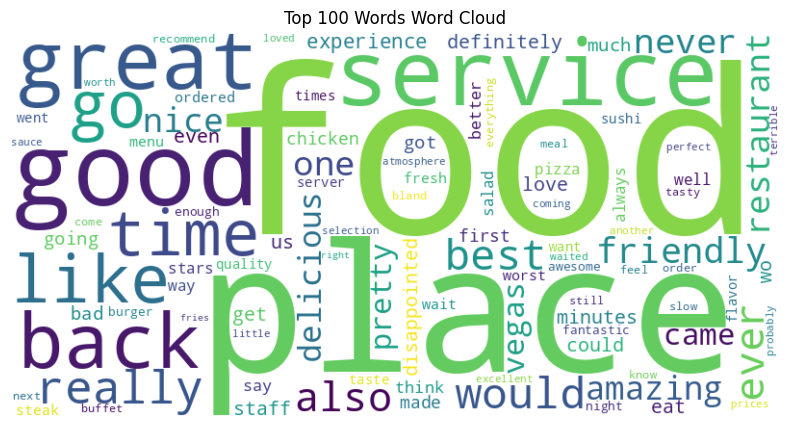

In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

# Combine all text into a single string
all_text = " ".join(df1['Review'].tolist())

# Tokenize the text
tokens = word_tokenize(all_text)

# Convert words to lowercase and remove stopwords and punctuation
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Count the frequency of each word
word_freq = Counter(tokens)

# Select the top 100 most frequent words
top_words = word_freq.most_common(100)

# Convert the top words to a dictionary for WordCloud
wordcloud_dict = dict(top_words)

# Create the Word Cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_dict)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Words Word Cloud')
plt.show()